# Semi-Infinite Limit

We compute here the analytical solution to the unperturbed Green's function in the MTI for the thin-film limit.

In [24]:
import math
import numpy as np

from MTI_Analytical import parameters
from MTI_Differential_Equation import GMTI_NeumannBC


# define non-homogeneity alpha and a_i coefficients
def coefficients(spin, L, omega, C0 = -0.0068, D1 = 1.3, A1 = 2.2, M0 = 0.28, B1 = 10, hbar = 1.):

    # get coefficients lambda_i, gamma_i
    l1, l2, g1, g2 = parameters(spin=spin, L=L, omega=omega, C0=C0, D1=D1, A1=A1, M0=M0, B1=B1, hbar=hbar)

    # compute non-homogeneity
    aplus = hbar/(B1-D1); aminus = -hbar/(B1+D1)

    # initialize matrix for coefficients a_{1,2}
    a_coeff = np.empty((2,2), dtype='object')
    
    
    ### coefficients ++ ###
    # coefficient a1
    a1 = aplus * (g1*l1-g2*l2) / ( l1*l2*(g1-g2) )
    # coefficient a2
    a2 = -1j*aplus * (g1*l1-g2*l2)*(g2*l1+g1*l2) / ( l1*l2*(g1-g2)*(g2*l1-g1*l2) )
    # add to matrix
    a_coeff[0][0] = (a1, a2)

    ### coefficients +- ###
    # coefficient a1
    a1 = aminus * (l1-l2) / ( l1*l2*(g1-g2) )
    # coefficient a2
    a2 = -1j*aminus * (l1+l2) / ( l1*l2*(g1-g2) )
    # add to matrix
    a_coeff[0][1] = (a1, a2)

    ### coefficients -+ ###
    # coefficient a1
    a1 = -aplus * g1*g2*(l1-l2) / ( l1*l2*(g1-g2) )
    # coefficient a2
    a2 = 1j*aplus * g1*g2*(l1+l2) / ( l1*l2*(g1-g2) )
    # add to matrix
    a_coeff[1][0] = (a1, a2)

    ### coefficients -- ###
    # coefficient a1
    a1 = aminus * (g1*l2-g2*l1) / ( l1*l2*(g1-g2) )
    # coefficient a2
    a2 = -1j*aminus * (g1*l2-g2*l1)*(g1*l1+g2*l2) / ( l1*l2*(g1-g2)*(g1*l1-g2*l2) )
    # add to matrix
    a_coeff[1][1] = (a1, a2)

    return  a_coeff, l1.real, l1.imag


# function for change of basis in MTI Green's function
def Change_Basis(gf):

    g_new = [[gf[0][0], gf[0][2], gf[0][1], gf[0][3]],
             [gf[2][0], gf[2][2], gf[2][1], gf[2][3]],
             [gf[1][0], gf[1][2], gf[1][1], gf[1][3]],
             [gf[3][0], gf[3][2], gf[3][1], gf[3][3]]]
    
    return np.array(g_new)


# evaluate GF at z=0 in the semi-infinite case
def GMTI_SemiInfinite(d, Z, L, omega, C0 = -0.0068, D1 = 1.3, A1 = 2.2, M0 = 0.28, B1 = 10, hbar = 1.):

    g = []
    for spin in ['up', 'down']:

        # initialize matrix
        g_sigma = np.empty((2,2), dtype='complex')
        # get coefficients
        a_coeff, l, k = coefficients(spin=spin, L=L, omega=omega, C0=C0, D1=D1, A1=A1, M0=M0, B1=B1, hbar=hbar)

        
        for idx in range(2):
            for jdx in range(2):

                a1 = a_coeff[idx][jdx][0]; a2 = a_coeff[idx][jdx][1]
                g_sigma[idx][jdx] = math.exp(-l*Z) * ( a1*np.cos(k*Z) + a2*np.sin(k*Z) )

        g.append(g_sigma)
                
    return np.block([[g[0], np.zeros((2, 2))], [np.zeros((2, 2)), g[1]]])


# parameters
L = 0.010; w = 0.; d = 75
# lattice
lattice = np.linspace(0, d, 250)

# full solution
Gfull = np.array([Change_Basis(GMTI_NeumannBC(d=d, z=0., Z=z, kx=0., ky=0., L=L, w=w)) for z in lattice])
# analytical approximation
G_semiinf = np.array([GMTI_SemiInfinite(d=d, Z=z, L=L, omega=w) for z in lattice])

### <font color='black'> Comparison </font> 

We compare the analytical solution obtained in the semi-infinite limit with the full solution at $z=0$.

#### <font color='green'> **Real Part** </font> 

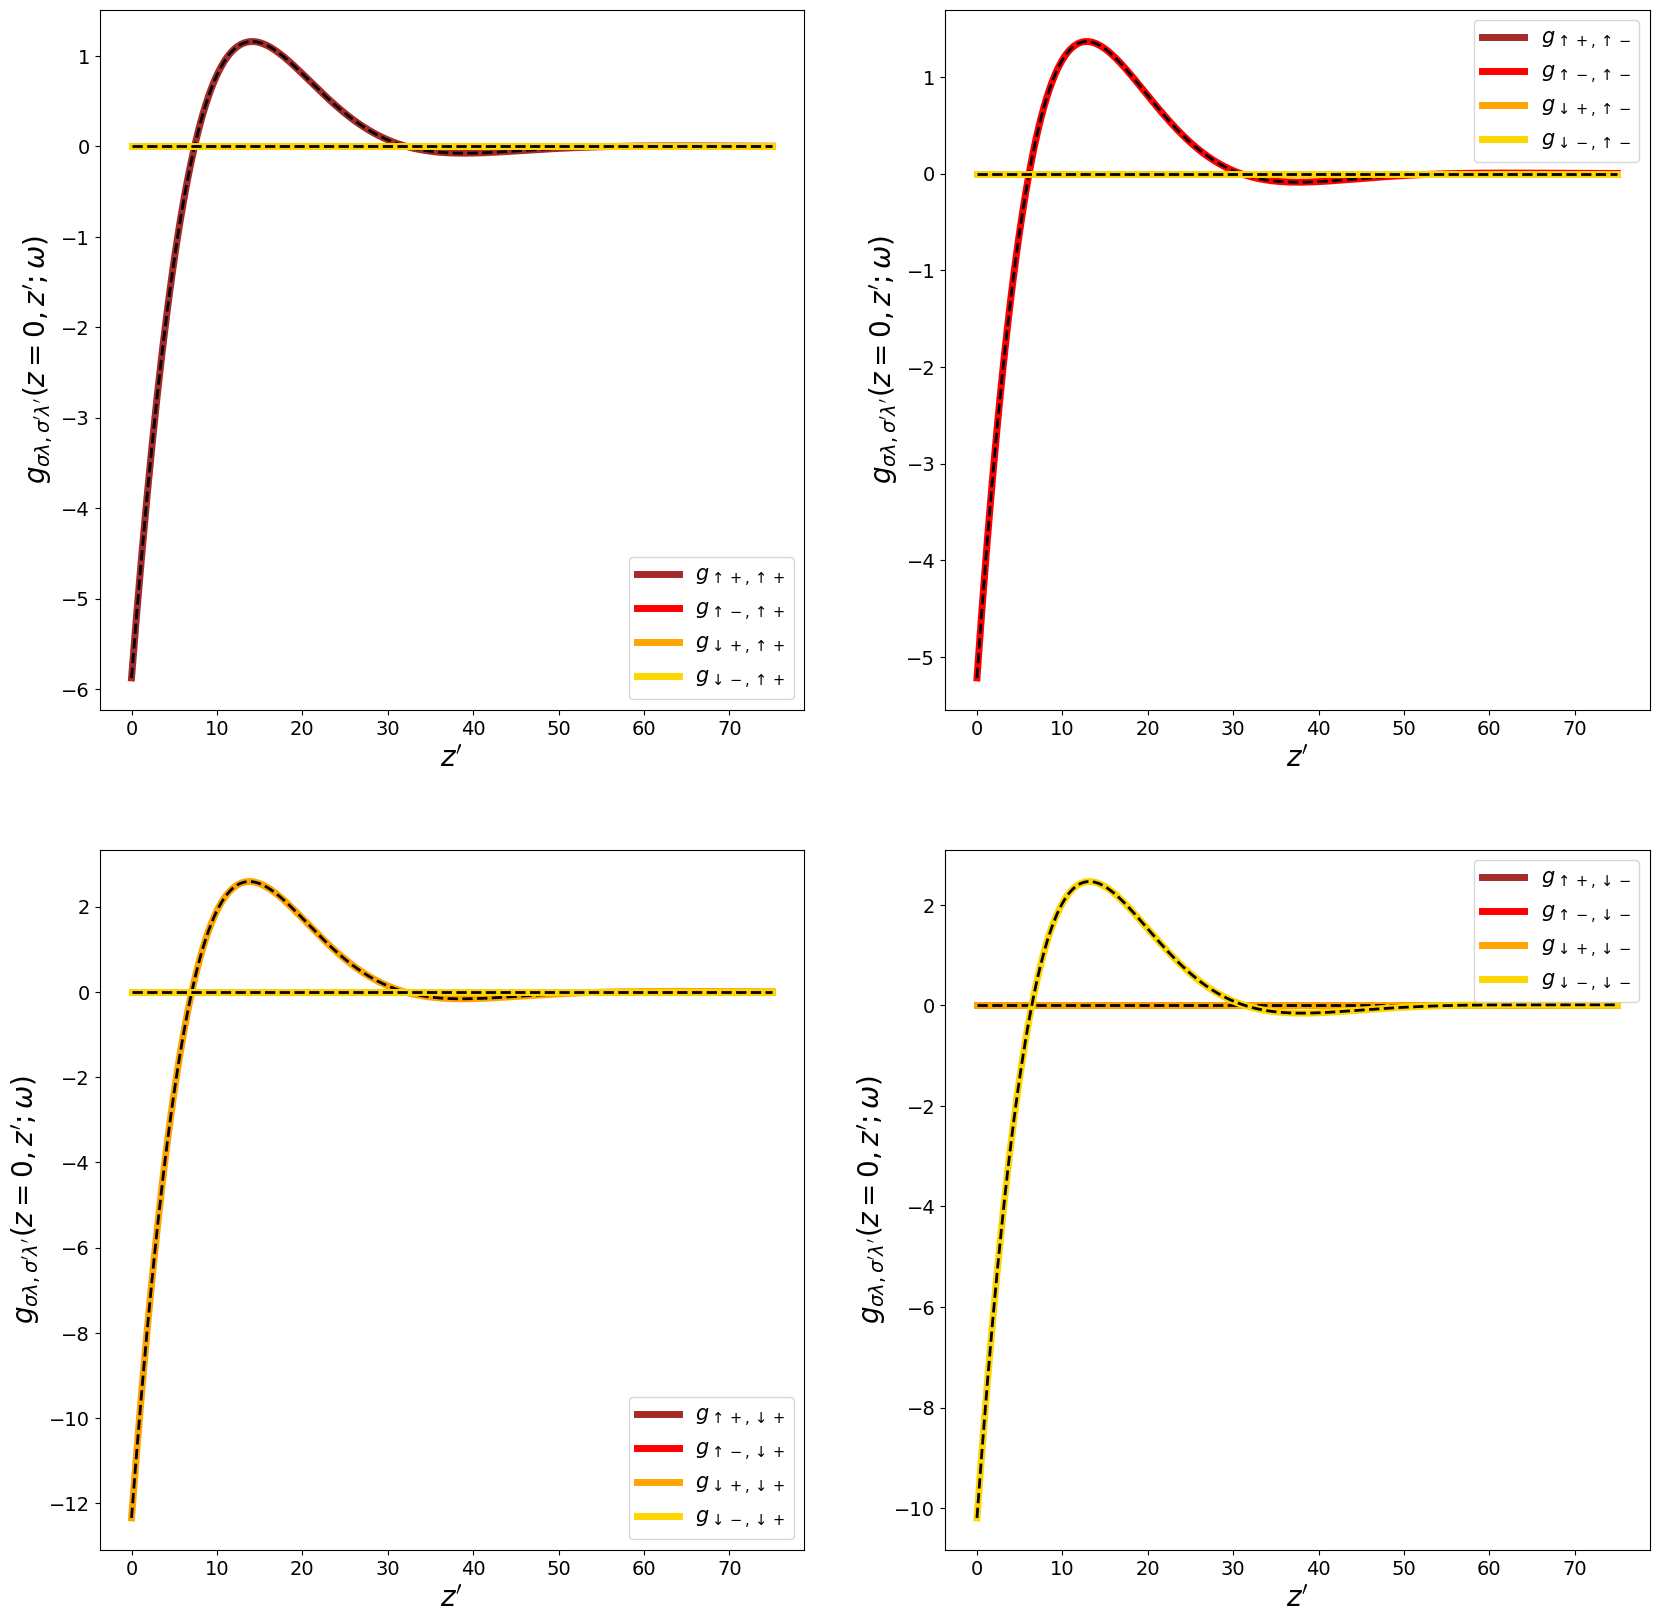

In [25]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm

# colors for plotting
colors = ['brown', 'red', 'orange', 'gold']
# labels for curves
labels = Change_Basis([["$g_{\\uparrow +, \\uparrow +}$", "$g_{\\uparrow +, \downarrow +}$", "$g_{\\uparrow +, \\uparrow -}$", "$g_{\\uparrow +, \downarrow -}$"],
          ["$g_{\downarrow +, \\uparrow +}$", "$g_{\downarrow +, \downarrow +}$", "$g_{\downarrow +, \\uparrow -}$", "$g_{\downarrow +, \downarrow -}$"],
          ["$g_{\\uparrow -, \\uparrow +}$", "$g_{\\uparrow -, \downarrow +}$", "$g_{\\uparrow -, \\uparrow -}$", "$g_{\\uparrow -, \downarrow -}$"],
          ["$g_{\downarrow -, \\uparrow +}$", "$g_{\downarrow -, \downarrow +}$", "$g_{\downarrow -, \\uparrow -}$", "$g_{\downarrow -, \downarrow -}$"]])

# subplots
fig, axs = plt.subplots(2,2, figsize=(20, 20))

# indices referred to GF matrix
for icol in range(4):
        
    # indices for plotting
    if icol==0: iPic = 0; jPic = 0
    if icol==1: iPic = 0; jPic = 1
    if icol==2: iPic = 1; jPic = 0
    if icol==3: iPic = 1; jPic = 1
    
    for irow in range(4):
        # analytical approximation semi-infinite limit
        axs[iPic][jPic].plot(lattice, G_semiinf[:,irow,icol].real, lw=5, label=labels[irow][icol], c=colors[irow])
        # full result
        axs[iPic][jPic].plot(lattice, Gfull[:,irow,icol].real, lw=2, ls='--', c='black')        

    axs[iPic][jPic].set_xlabel('$z\'$', fontsize = 20)
    axs[iPic][jPic].set_ylabel("$g_{\sigma\lambda, \sigma'\lambda'}(z=0,z';\omega)$", fontsize = 20)
            
    axs[iPic][jPic].tick_params(axis='both', which='major', labelsize=14)        
    axs[iPic][jPic].legend(fontsize=15)

#### <font color='green'> **Imaginary Part** </font> 

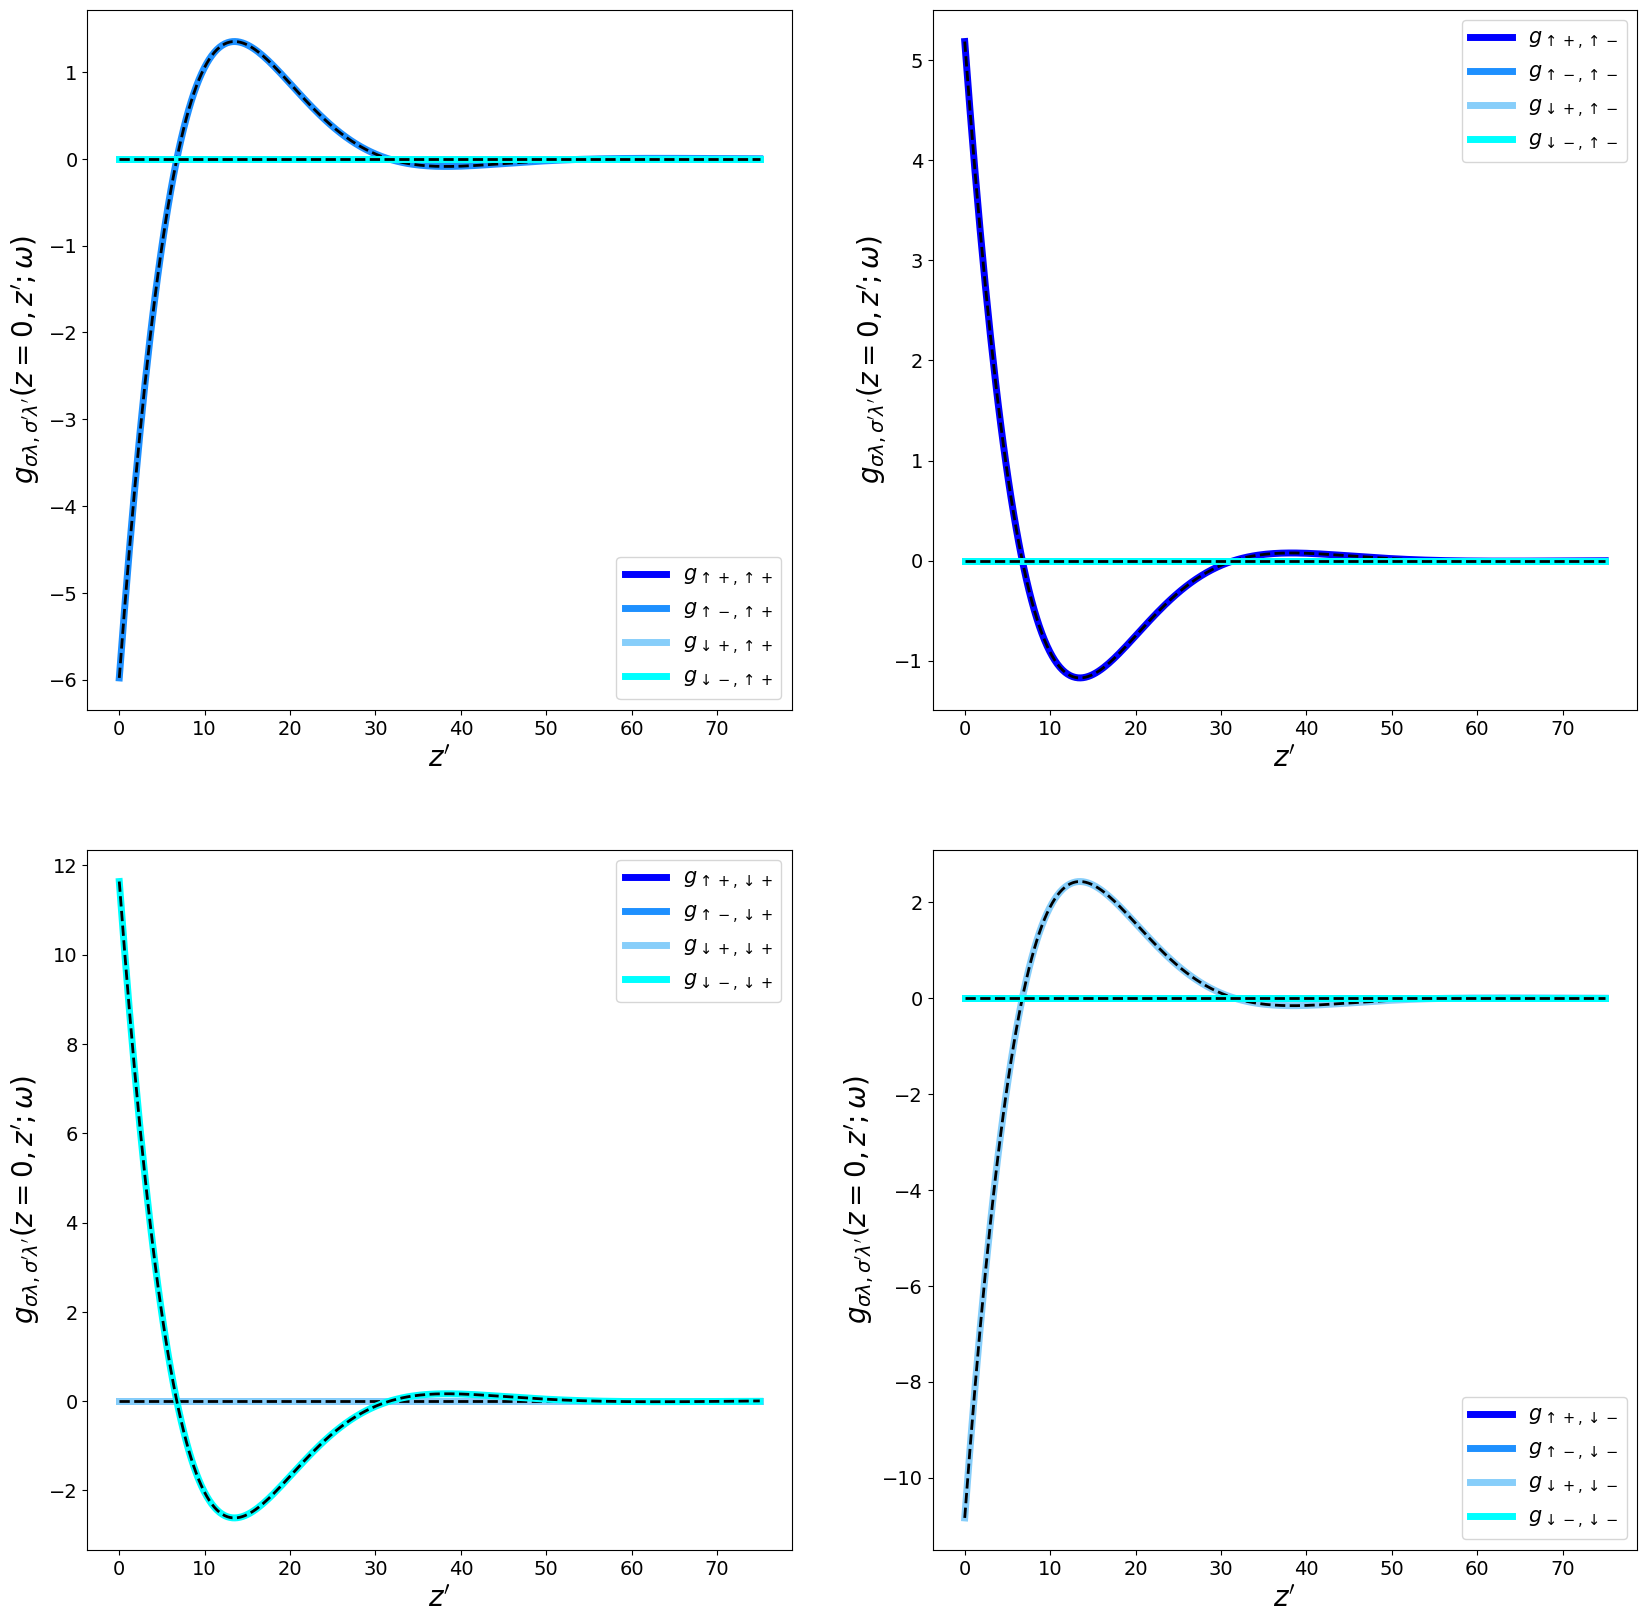

In [26]:
# colors for plotting
colors = ['blue','dodgerblue','lightskyblue','cyan']
# subplots
fig, axs = plt.subplots(2,2, figsize=(20, 20))

# indices referred to GF matrix
for icol in range(4):
        
    # indices for plotting
    if icol==0: iPic = 0; jPic = 0
    if icol==1: iPic = 0; jPic = 1
    if icol==2: iPic = 1; jPic = 0
    if icol==3: iPic = 1; jPic = 1
    
    for irow in range(4):
        # analytical approximation semi-infinite limit
        axs[iPic][jPic].plot(lattice, G_semiinf[:,irow,icol].imag, lw=5, label=labels[irow][icol], c=colors[irow])
        # full result
        axs[iPic][jPic].plot(lattice, Gfull[:,irow,icol].imag, lw=2, ls='--', c='black')        

    axs[iPic][jPic].set_xlabel('$z\'$', fontsize = 20)
    axs[iPic][jPic].set_ylabel("$g_{\sigma\lambda, \sigma'\lambda'}(z=0,z';\omega)$", fontsize = 20)
            
    axs[iPic][jPic].tick_params(axis='both', which='major', labelsize=14)        
    axs[iPic][jPic].legend(fontsize=15)

### <font color='black'> Induced Pairing </font> 

We compute here the induced pairing usign the normal MTI Green's function $\mathcal{G}^{(0)}_{MTI}(z=0,z')$ obtained in the semi-infinite limit 

In [4]:
from SC_Gorkov_Equation import GSC_matrix, FSC_matrix

# Hamiltonian parameters
params=dict(C = -0.0068, D1 = 1.3, D2 = 19.6, A1 = 2.2, A2 = 4.1, M = 0.28, B1 = 10, B2 = 56.6)


# Function evaluating the F2-MTI using the G0 obtained analytically in the semi-infinite limit
def FMTI2_SemiInfinite(d, z, Z, L, mu, Delta, omega, Gamma, C = -0.0068, D1 = 1.3, A1 = 2.2, M = 0.28, B1 = 10, hbar=1., t=1.):

    # GMTI(z0,z)
    GMTIz = GMTI_SemiInfinite(d=d, Z=z, L=L, omega=-omega, C0=C, D1=D1, A1=A1, M0=M, B1=B1, hbar=hbar)
    
    # GMTI(z0,z')
    GMTIZ = GMTI_SemiInfinite(d=d, Z=Z, L=L, omega=omega, C0=C, D1=D1, A1=A1, M0=M, B1=B1, hbar=hbar)
    
    # FSC(0)
    FSC = FSC_matrix(z=0., kx=0., ky=0., mu=mu, Delta=Delta, w=omega, t=t, hbar=hbar)
    
    return (np.transpose(GMTIz) @ np.conj(Gamma) @ FSC @ Gamma.H @ GMTIZ).A


# finite z-lattice
d = 100.; lattice = np.linspace(0., d, 250)
# parameters
mu = 0.010; Delta = 0.005; L = 0.050; omega = 0.0025
# coupling matrices
Gamma = np.matrix([[1,0],[1,0],[0,1],[0,1]])

# compute second order correction (Neumann BC)
F2_pairing = np.array([FMTI2_SemiInfinite(d=d, z=z, Z=z, L=L, mu=mu, Delta=Delta, omega=omega, Gamma=Gamma) for z in lattice])

#### <font color='green'> **Induced Pairing** </font> 

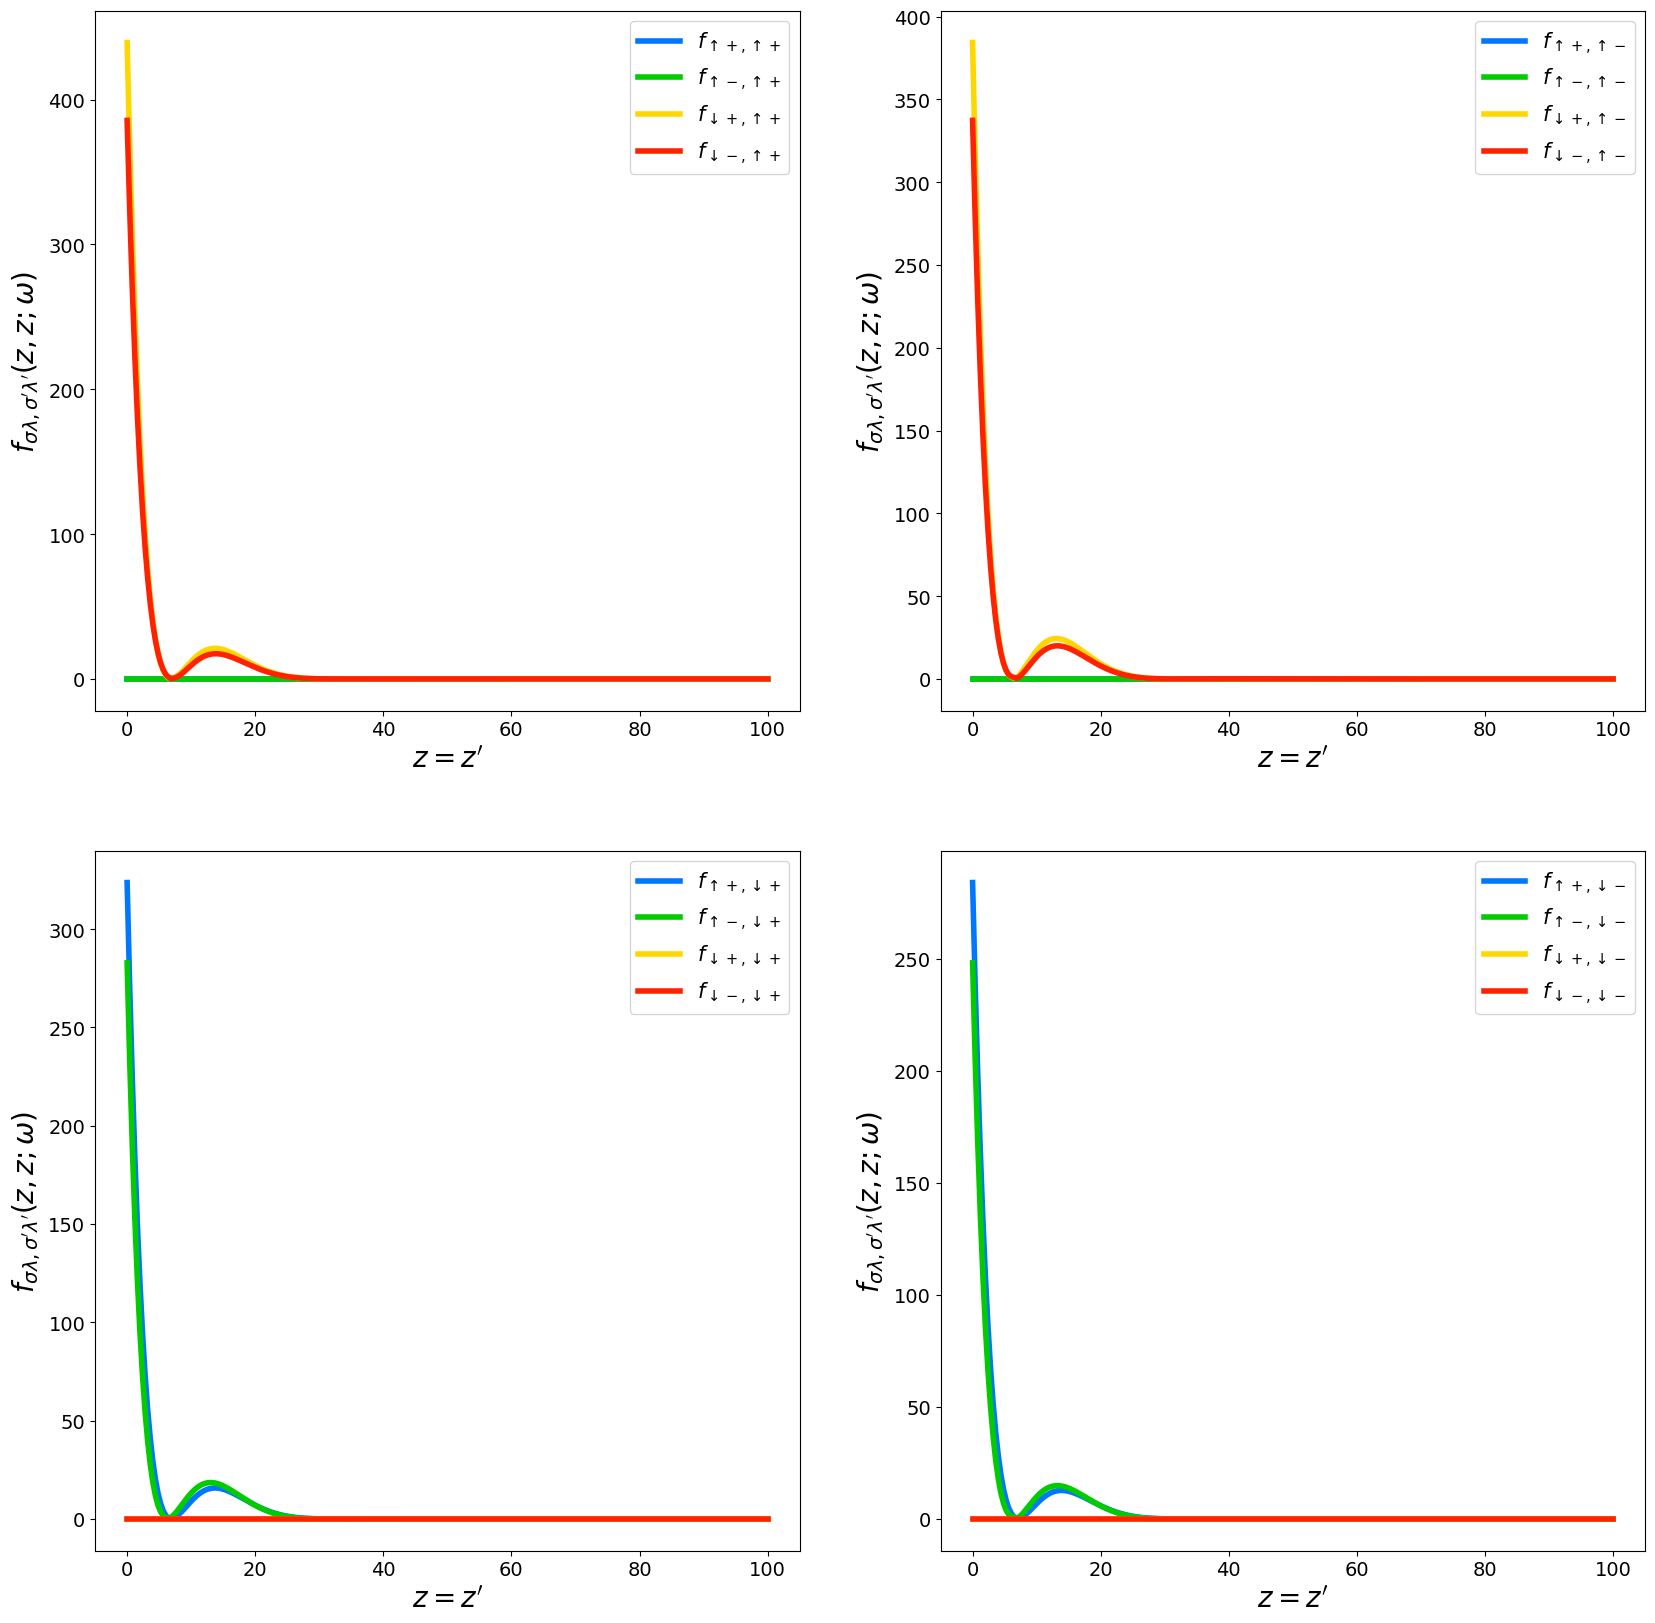

In [5]:
# labels for curves
Flabels = Change_Basis([["$f_{\\uparrow +, \\uparrow +}$", "$f_{\\uparrow +, \downarrow +}$", "$f_{\\uparrow +, \\uparrow -}$", "$f_{\\uparrow +, \downarrow -}$"],
          ["$f_{\downarrow +, \\uparrow +}$", "$f_{\downarrow +, \downarrow +}$", "$f_{\downarrow +, \\uparrow -}$", "$f_{\downarrow +, \downarrow -}$"],
          ["$f_{\\uparrow -, \\uparrow +}$", "$f_{\\uparrow -, \downarrow +}$", "$f_{\\uparrow -, \\uparrow -}$", "$f_{\\uparrow -, \downarrow -}$"],
          ["$f_{\downarrow -, \\uparrow +}$", "$f_{\downarrow -, \downarrow +}$", "$f_{\downarrow -, \\uparrow -}$", "$f_{\downarrow -, \downarrow -}$"]])

# colors for plotting
colors = ["#0077FF", "#00CC00", "#FFD700", "#FF2200",]
# subplots
fig, axs = plt.subplots(2,2, figsize=(20, 20))


# indices referred to GF matrix
for icol in range(4):
        
    # indices for plotting
    if icol==0: iPic = 0; jPic = 0
    if icol==1: iPic = 0; jPic = 1
    if icol==2: iPic = 1; jPic = 0
    if icol==3: iPic = 1; jPic = 1
    
    for irow in range(4):

        # plot second order correction F2
        axs[iPic][jPic].plot(lattice, [abs(F2_pairing[idx][irow][icol]) for idx in range(len(lattice))], c=colors[irow], lw=4, label=Flabels[irow][icol] )

    
    axs[iPic][jPic].set_xlabel("$z=z'$", fontsize = 20)
    axs[iPic][jPic].set_ylabel("$f_{\sigma\lambda, \sigma'\lambda'}(z,z;\omega)$", fontsize = 20)
        
    axs[iPic][jPic].tick_params(axis='both', which='major', labelsize=14)        
    axs[iPic][jPic].legend(fontsize=15);

#fig.savefig('F2-zz.svg', bbox_inches='tight')